In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import re
%run functions.py
import pickle

import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE
from sklearn.decomposition import NMF, LatentDirichletAllocation, PCA

from sklearn.mixture import GMM
from sklearn import mixture
from sklearn.mixture import GaussianMixture

from nltk import word_tokenize, sent_tokenize
from nltk.stem import SnowballStemmer, PorterStemmer

from gensim.matutils import Sparse2Corpus
from gensim import models

%matplotlib inline

import matplotlib.gridspec as gridspec

from subprocess import check_output

from wordcloud import WordCloud,STOPWORDS

import warnings
warnings.filterwarnings("ignore")

In [ ]:

df=unpickle_('df_clean.pickle')
count_vectorizer=unpickle_('count_vectorizer.pickle')
count_sparse=unpickle_('count_sparse.pickle')
tfidf_vectorizer=unpickle_('tfidf_vectorizer.pickle')
tfidf_sparse=unpickle_('tfidf_sparse.pickle')


## DBSCAN

In [112]:
from sklearn.cluster import DBSCAN

In [118]:
def dbscan_model(sparse_matrix, eps, min_samples, leaf_size=30, p=None):
    model = DBSCAN(eps=eps, min_samples=min_samples, leaf_size=leaf_size, p=p, n_jobs=-1)
    db_cluster_space = model.fit_predict(sparse_matrix)
    return model, db_cluster_space

In [119]:
db_model, db_clusters = dbscan_model(tfidf_sparse, .5, 5)

In [120]:
db_model.components_

<9x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 915 stored elements in Compressed Sparse Row format>

In [122]:
db_clusters

array([-1, -1, -1, ..., -1, -1, -1])

In [ ]:
#pickle_(db_model, 'db_model')
#pickle_(db_clusters, 'db_clusters')

'''
db_model=unpickle_('db_model.pickle')
db_clusters=unpickle_('db_clusters.pickle')

print(topic_model(tfidf_vectorizer, db_model, num_words=10))
db_clusters=scaled_matrix(db_clusters)
print(top_doc_per_topic(db_clusters, 3, df))
db_2D_model, db_2d_matrix = tsne_model(db_clusters, num_dimensions=2, n_iter=2000)
pickle_(db_2D_model, 'db_2D_model')
pickle_(db_2d_matrix, 'db_2d_matrix')

db_2D_model=unpickle_('db_2D_model.pickle')
db_2d_matrix=unpickle_('db_2d_matrix.pickle')
df_2d_db=tsne_df_2D(db_2d_matrix, db_clusters, df)
pickle_(df_2d_db, 'df_2d_db')
#df_2d_db=unpickle_('df_2d_db.pickle')

#these topics are not accurate yet
tsne_2d_plot(df_2d_db, 2017, fifteen_topics)'''

In [209]:
#dbscan test
'''dbscan = DBSCAN(eps=.5, min_samples=5, leaf_size=30, p=None, n_jobs=-1)
dbscan.fit(tfidf_sparse)

from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(tfidf_sparse)
pca_2d = pca.transform(tfidf_sparse)
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='*')
        plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2','Noise'])
        plt.title('DBSCAN finds 2 clusters and noise')
        plt.show()
''';

## Gaussian Mixture Model

In [129]:
#gmm clustering model
def gmm_model(dense_matrix, n_components, tol, reg_covar, max_iter, n_init):
    model = GaussianMixture(n_components=n_components, tol=tol, 
                            reg_covar=reg_covar, max_iter=max_iter, 
                            n_init=n_init, random_state=42)
    model.fit(dense_matrix)
    gmm_clusters = model.predict(dense_matrix)
    #gmm_cluster_space = model.fit_transform(dense_matrix)
    return model, gmm_clusters

In [130]:
model_gmm, gmm_cluster_space = gmm_model(tfidf_sparse.toarray(), 
                                                       n_components=15, 
                                                       tol=0.001, reg_covar=1e-6, 
                                                       max_iter=1000, n_init=1)

In [131]:
model_gmm.means_.shape

(15, 2000)

In [133]:
gmm_cluster_space.shape

(7238,)

In [136]:
model_gmm.covariances_.shape

(15, 2000, 2000)

In [139]:
#pickle_(model_gmm, 'model_gmm')
#pickle_(gmm_cluster_space, 'gmm_cluster_space')

'''
model_gmm=unpickle_('model_gmm.pickle')
gmm_cluster_space=unpickle_('gmm_cluster_space.pickle')
'''
topic_model3(tfidf_vectorizer, model_gmm, num_words=10)


Topic 1
['network', 'train', 'layer', 'unit', 'learn', 'input', 'neural', 'weight', 'hidden', 'output']
Topic 2
['node', 'graph', 'tree', 'algorithm', 'edg', 'v', 'network', 'y', 'variabl', 'u']
Topic 3
['agent', 'action', 'reward', 'game', 'learn', 'state', 'polici', 'player', 'reinforc', 'pomdp']
Topic 4
['kernel', 'y', 'f', 'learn', 'data', 'featur', 'svm', 'xi', 'h', 'method']
Topic 5
['f', 'w', 'algorithm', 'y', 'bound', 'h', 'convex', 'z', 'optim', 'v']
Topic 6
['data', 'learn', 'time', 'estim', 'word', 'algorithm', 'signal', 'y', 'state', 'train']
Topic 7
['spike', 'neuron', 'synapt', 'time', 'synaps', 'stimulu', 'rate', 'input', 'neural', 'ms']
Topic 8
['distribut', 'z', 'sampl', 'q', 'data', 'posterior', 'gaussian', 'y', 'estim', 'infer']
Topic 9
['neuron', 'cell', 'network', 'circuit', 'activ', 'respons', 'chip', 'input', 'synaps', 'synapt']
Topic 10
['cluster', 'algorithm', 'data', 'graph', 'partit', 'point', 'matrix', 'y', 'mean', 'spectral']
Topic 11
['polici', 'action', '

"\ngmm_2D_model=unpickle_('gmm_2D_model.pickle')\ngmm_2d_matrix=unpickle_('gmm_2d_matrix.pickle')"

In [145]:
gmm_cluster_space=gmm_cluster_space.reshape(-1,1)

In [148]:
#gmm_cluster_space=scaled_matrix(gmm_cluster_space)
#top_doc_per_topic(gmm_cluster_space, 3, df)
#gmm_2D_model, gmm_2d_matrix = tsne_model(gmm_cluster_space, num_dimensions=2, perplexity=30, n_iter=2000)
#pickle_(gmm_2D_model, 'gmm_2D_model')
#pickle_(gmm_2d_matrix, 'gmm_2d_matrix')
'''
gmm_2D_model=unpickle_('gmm_2D_model.pickle')
gmm_2d_matrix=unpickle_('gmm_2d_matrix.pickle')'''

"\ngmm_2D_model=unpickle_('gmm_2D_model.pickle')\ngmm_2d_matrix=unpickle_('gmm_2d_matrix.pickle')"

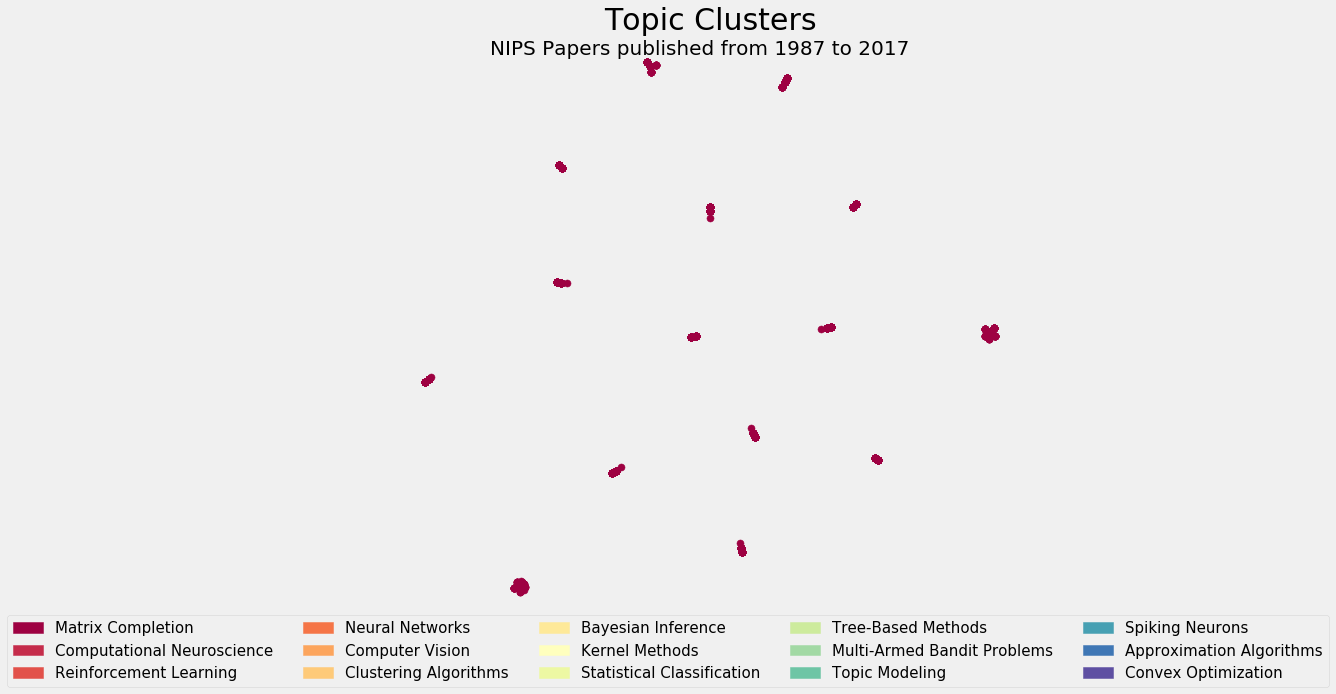

In [152]:
df_2d_gmm=tsne_df_2D(gmm_2d_matrix, gmm_cluster_space, df)
#pickle_(df_2d_gmm, 'df_2d_gmm')
#df_2d_gmm=unpickle_('df_2d_gmm.pickle')

#these topics are not accurate yet
tsne_2d_plot(df_2d_gmm, 2017, fifteen_topics)

In [153]:
gmm_cluster_space

array([[-0.37101903],
       [-0.37101903],
       [-1.54195987],
       ...,
       [ 0.56573365],
       [ 0.56573365],
       [ 1.73667449]])

In [154]:
gmm_2d_matrix

array([[ -3.4048378 ,   0.6348423 ],
       [ -3.4048378 ,   0.6348423 ],
       [  0.74745256,  28.914072  ],
       ...,
       [-62.74151   ,  -8.84158   ],
       [-62.74151   ,  -8.84158   ],
       [ 10.569174  , -20.973682  ]], dtype=float32)

In [ ]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

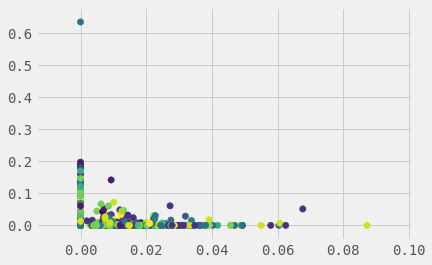

In [271]:
gmm = GMM(n_components=15).fit(tfidf_sparse.toarray())
labels = gmm.predict(tfidf_sparse.toarray())
plt.scatter(tfidf_sparse.toarray()[:, 0], tfidf_sparse.toarray()[:, 1], c=labels, s=40, cmap='viridis')